In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Train.csv')
df.head()
#posCoditionCode = 03 : Merchant suspicious of transaction

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,isFraud
0,100547107,10/30/2011,US,2430.03,786,1222,True,2500,69.97,29-Jun,10/30/2011,786,False,fastfood,US,Arbys #46046,1.0,2.0,204.23,2016-01-17T21:50:04Z,PURCHASE,False
1,100547107,10/30/2011,US,2070.52,786,1222,True,2500,429.48,27-Jan,10/30/2011,786,False,fastfood,US,In-N-Out #27394,1.0,9.0,91.14,2016-01-30T20:49:10Z,PURCHASE,False
2,100547107,10/30/2011,US,2100.09,786,1222,True,2500,399.91,22-Mar,10/30/2011,786,False,fastfood,US,Wendys #327348,1.0,2.0,1.06,2016-02-26T04:02:55Z,PURCHASE,False
3,100547107,10/30/2011,US,2408.37,786,1222,True,2500,91.63,28-Dec,10/30/2011,786,False,fastfood,US,Tim Hortons #911569,8.0,2.0,286.07,2016-04-02T20:23:39Z,PURCHASE,True
4,100547107,10/30/2011,US,2049.98,786,1222,True,2500,450.02,27-Apr,10/30/2011,786,False,fastfood,US,Popeyes #203711,1.0,2.0,31.63,2016-04-06T15:10:02Z,PURCHASE,False


In [4]:
df_ts = pd.read_csv('/content/drive/My Drive/Train.csv',header=0, parse_dates=[19], index_col=19, squeeze=True)
df['transactionDateTime']= pd.to_datetime(df['transactionDateTime'])
#df_ts['transactionDateTime']= pd.to_datetime(df_ts['transactionDateTime'])
#df_ts.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228557 entries, 0 to 228556
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   accountNumber             228557 non-null  int64              
 1   accountOpenDate           228557 non-null  object             
 2   acqCountry                227130 non-null  object             
 3   availableMoney            228557 non-null  float64            
 4   cardCVV                   228557 non-null  int64              
 5   cardLast4Digits           228557 non-null  int64              
 6   cardPresent               228557 non-null  bool               
 7   creditLimit               228557 non-null  int64              
 8   currentBalance            228557 non-null  float64            
 9   currentExpDate            228557 non-null  object             
 10  dateOfLastAddressChange   228557 non-null  object             
 11  

In [6]:
df_ts.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionType,isFraud
transactionDateTime,,,,,,,,,,,,,,,,,,,,,
2016-01-17 21:50:04+00:00,100547107,10/30/2011,US,2430.03,786,1222,True,2500,69.97,29-Jun,10/30/2011,786,False,fastfood,US,Arbys #46046,1.0,2.0,204.23,PURCHASE,False
2016-01-30 20:49:10+00:00,100547107,10/30/2011,US,2070.52,786,1222,True,2500,429.48,27-Jan,10/30/2011,786,False,fastfood,US,In-N-Out #27394,1.0,9.0,91.14,PURCHASE,False
2016-02-26 04:02:55+00:00,100547107,10/30/2011,US,2100.09,786,1222,True,2500,399.91,22-Mar,10/30/2011,786,False,fastfood,US,Wendys #327348,1.0,2.0,1.06,PURCHASE,False
2016-04-02 20:23:39+00:00,100547107,10/30/2011,US,2408.37,786,1222,True,2500,91.63,28-Dec,10/30/2011,786,False,fastfood,US,Tim Hortons #911569,8.0,2.0,286.07,PURCHASE,True
2016-04-06 15:10:02+00:00,100547107,10/30/2011,US,2049.98,786,1222,True,2500,450.02,27-Apr,10/30/2011,786,False,fastfood,US,Popeyes #203711,1.0,2.0,31.63,PURCHASE,False


In [5]:
label_encoder = preprocessing.LabelEncoder() 
df['isFraud']= label_encoder.fit_transform(df['isFraud']) 
df['cardPresent']= label_encoder.fit_transform(df['cardPresent']) 
df['expirationDateKeyInMatch']= label_encoder.fit_transform(df['expirationDateKeyInMatch'])
#df_ts['isFraud']= label_encoder.fit_transform(df_ts['isFraud'])
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,isFraud
0,100547107,10/30/2011,US,2430.03,786,1222,1,2500,69.97,29-Jun,10/30/2011,786,0,fastfood,US,Arbys #46046,1.0,2.0,204.23,2016-01-17 21:50:04+00:00,PURCHASE,0
1,100547107,10/30/2011,US,2070.52,786,1222,1,2500,429.48,27-Jan,10/30/2011,786,0,fastfood,US,In-N-Out #27394,1.0,9.0,91.14,2016-01-30 20:49:10+00:00,PURCHASE,0
2,100547107,10/30/2011,US,2100.09,786,1222,1,2500,399.91,22-Mar,10/30/2011,786,0,fastfood,US,Wendys #327348,1.0,2.0,1.06,2016-02-26 04:02:55+00:00,PURCHASE,0
3,100547107,10/30/2011,US,2408.37,786,1222,1,2500,91.63,28-Dec,10/30/2011,786,0,fastfood,US,Tim Hortons #911569,8.0,2.0,286.07,2016-04-02 20:23:39+00:00,PURCHASE,1
4,100547107,10/30/2011,US,2049.98,786,1222,1,2500,450.02,27-Apr,10/30/2011,786,0,fastfood,US,Popeyes #203711,1.0,2.0,31.63,2016-04-06 15:10:02+00:00,PURCHASE,0


In [6]:
df.isnull().sum()

accountNumber                  0
accountOpenDate                0
acqCountry                  1427
availableMoney                 0
cardCVV                        0
cardLast4Digits                0
cardPresent                    0
creditLimit                    0
currentBalance                 0
currentExpDate                 0
dateOfLastAddressChange        0
enteredCVV                     0
expirationDateKeyInMatch       0
merchantCategoryCode           0
merchantCountryCode          227
merchantName                   0
posConditionCode             102
posEntryMode                1279
transactionAmount              0
transactionDateTime            0
transactionType              225
isFraud                        0
dtype: int64

In [ ]:
# df['boolean_merCode'] = df['merchantCountryCode'].isnull().any()
# df['boolean_merCode']= label_encoder.fit_transform(df['boolean_merCode']) 

# df['boolean_posCC'] = df['posConditionCode'].isnull().any()
# df['boolean_posCC']= label_encoder.fit_transform(df['boolean_posCC']) 

# df['boolean_posEM'] = df['posEntryMode'].isnull().any()
# df['boolean_posEM']= label_encoder.fit_transform(df['boolean_posEM']) 

# df['boolean_transType'] = df['transactionType'].isnull().any()
# df['boolean_transType']= label_encoder.fit_transform(df['boolean_transType']) 

# df.head()


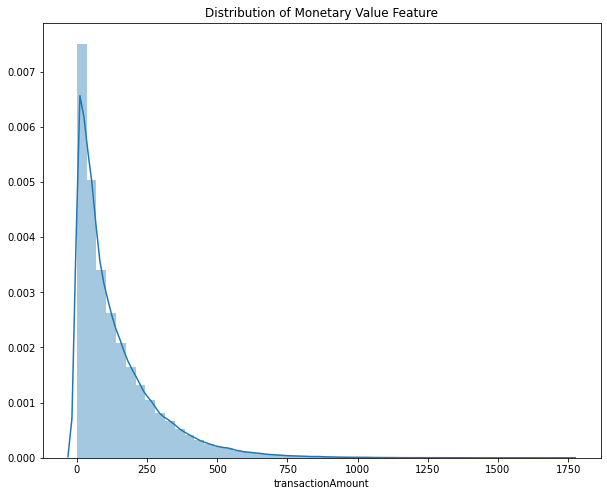

In [7]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.transactionAmount)

Text(0.5, 1.0, 'Heatmap of Correlation')

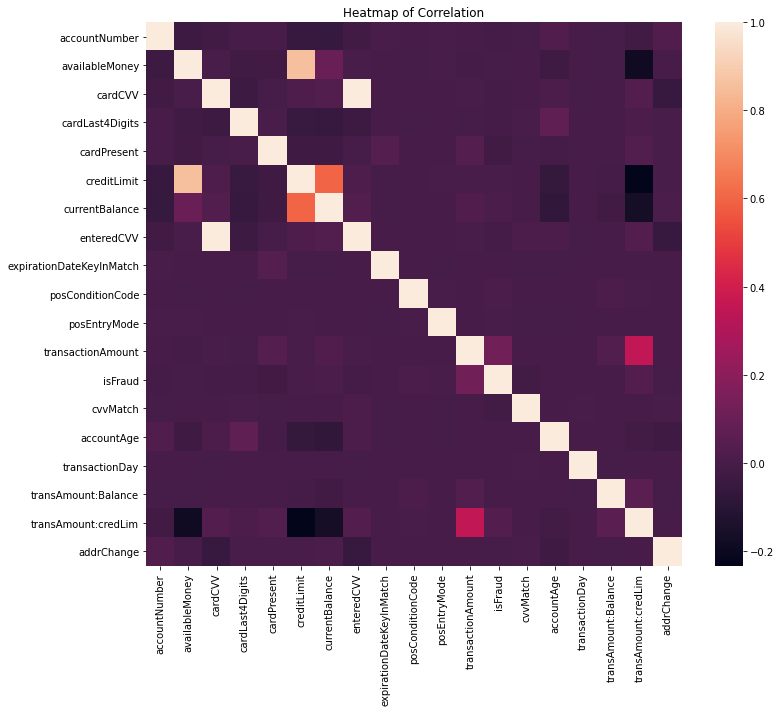

In [66]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [68]:
#skewness
skew_ = df.skew()
skew_

accountNumber                0.029341
availableMoney               2.889937
cardCVV                     -0.073426
cardLast4Digits              0.027656
cardPresent                  0.127219
creditLimit                  2.294119
currentBalance               3.591984
enteredCVV                  -0.072955
expirationDateKeyInMatch    26.421690
posConditionCode             8.955398
posEntryMode                 4.210199
transactionAmount            2.110335
transactionDateTime         -0.055698
isFraud                      5.091521
cvvMatch                   -10.203598
accountAge                   1.819638
transactionDay              -0.000488
transAmount:Balance               NaN
transAmount:credLim          7.972187
addrChange                  -0.036770
dtype: float64

In [8]:
df['cvvMatch'] = (df['cardCVV']==df['enteredCVV']).astype(int)
df.corr()

,accountNumber,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,enteredCVV,expirationDateKeyInMatch,posConditionCode,posEntryMode,transactionAmount,isFraud,cvvMatch
accountNumber,1.000000,-0.032230,-0.019072,0.002386,-0.000056,-0.055114,-0.056249,-0.018572,0.002690,-0.000957,0.006507,-0.001693,-0.009908,-0.004118
availableMoney,-0.032230,1.000000,0.005475,-0.023426,-0.017497,0.856449,0.100069,0.005537,-0.002037,-0.002296,0.002614,-0.009627,-0.002353,0.002451
cardCVV,-0.019072,0.005475,1.000000,-0.038635,-0.006153,0.018404,0.026980,0.995263,-0.000497,-0.000934,0.001337,0.006308,-0.008499,-0.002145
cardLast4Digits,0.002386,-0.023426,-0.038635,1.000000,0.003942,-0.046854,-0.053981,-0.038530,0.000707,-0.002602,-0.001215,-0.004005,-0.008955,0.003537
cardPresent,-0.000056,-0.017497,-0.006153,0.003942,1.000000,-0.029959,-0.030611,-0.006208,0.040274,-0.001335,0.001696,0.039601,-0.020187,-0.002711
creditLimit,-0.055114,0.856449,0.018404,-0.046854,-0.029959,1.000000,0.599345,0.018528,-0.003728,-0.000870,0.003208,0.003876,0.003790,0.001330
currentBalance,-0.056249,0.100069,0.026980,-0.053981,-0.030611,0.599345,1.000000,0.027125,-0.004028,0.001884,0.002128,0.022399,0.010955,-0.001237
enteredCVV,-0.018572,0.005537,0.995263,-0.038530,-0.006208,0.018528,0.027125,1.000000,-0.000800,-0.000964,0.001065,0.006602,-0.008326,0.014065
expirationDateKeyInMatch,0.002690,-0.002037,-0.000497,0.000707,0.040274,-0.003728,-0.004028,-0.000800,1.000000,0.001421,-0.002555,-0.000688,-0.001449,-0.004769
posConditionCode,-0.000957,-0.002296,-0.000934,-0.002602,-0.001335,-0.000870,0.001884,-0.000964,0.001421,1.000000,0.004926,0.001103,0.009945,0.000858


In [9]:
from dateutil.relativedelta import relativedelta
df['accountOpenDate']= pd.to_datetime(df['accountOpenDate'])
df['accountAge'] = [relativedelta(pd.to_datetime('now'), d).years for d in df['accountOpenDate']]

In [12]:
df.accountAge.unique()

array([ 8,  4,  5,  7,  6, 14, 10,  9, 16, 11, 12, 13, 15, 17, 19, 34])

In [69]:
df.corr()

,accountNumber,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,enteredCVV,expirationDateKeyInMatch,posConditionCode,posEntryMode,transactionAmount,isFraud,cvvMatch,accountAge,transactionDay,transAmount:Balance,transAmount:credLim,addrChange
accountNumber,1.000000,-0.032230,-0.019072,0.002386,-0.000056,-0.055114,-0.056249,-0.018572,0.002690,-0.000957,0.006507,-0.001693,-0.009908,-0.004118,0.025708,-0.000133,-0.004721,-0.017299,0.022122
availableMoney,-0.032230,1.000000,0.005475,-0.023426,-0.017497,0.856449,0.100069,0.005537,-0.002037,-0.002296,0.002614,-0.009627,-0.002353,0.002451,-0.029685,-0.000032,-0.002578,-0.185329,0.000290
cardCVV,-0.019072,0.005475,1.000000,-0.038635,-0.006153,0.018404,0.026980,0.995263,-0.000497,-0.000934,0.001337,0.006308,-0.008499,-0.002145,0.012697,-0.004595,0.001647,0.035749,-0.053161
cardLast4Digits,0.002386,-0.023426,-0.038635,1.000000,0.003942,-0.046854,-0.053981,-0.038530,0.000707,-0.002602,-0.001215,-0.004005,-0.008955,0.003537,0.074629,0.002033,0.001038,0.016043,0.007136
cardPresent,-0.000056,-0.017497,-0.006153,0.003942,1.000000,-0.029959,-0.030611,-0.006208,0.040274,-0.001335,0.001696,0.039601,-0.020187,-0.002711,-0.008325,-0.001811,-0.001628,0.027194,0.003191
creditLimit,-0.055114,0.856449,0.018404,-0.046854,-0.029959,1.000000,0.599345,0.018528,-0.003728,-0.000870,0.003208,0.003876,0.003790,0.001330,-0.061337,-0.000735,-0.011392,-0.233520,0.006562
currentBalance,-0.056249,0.100069,0.026980,-0.053981,-0.030611,0.599345,1.000000,0.027125,-0.004028,0.001884,0.002128,0.022399,0.010955,-0.001237,-0.072190,-0.001367,-0.017827,-0.162705,0.012197
enteredCVV,-0.018572,0.005537,0.995263,-0.038530,-0.006208,0.018528,0.027125,1.000000,-0.000800,-0.000964,0.001065,0.006602,-0.008326,0.014065,0.012685,-0.004181,0.001673,0.035569,-0.053123
expirationDateKeyInMatch,0.002690,-0.002037,-0.000497,0.000707,0.040274,-0.003728,-0.004028,-0.000800,1.000000,0.001421,-0.002555,-0.000688,-0.001449,-0.004769,-0.006806,-0.001897,-0.000591,-0.000475,0.001806
posConditionCode,-0.000957,-0.002296,-0.000934,-0.002602,-0.001335,-0.000870,0.001884,-0.000964,0.001421,1.000000,0.004926,0.001103,0.009945,0.000858,0.000631,-0.001650,0.016505,0.003326,-0.000951


In [13]:
df_new = df[['transactionDateTime','currentBalance','availableMoney','cardPresent','creditLimit','currentBalance','posConditionCode','posEntryMode','transactionAmount','isFraud','cvvMatch','accountAge']].copy()
df_new.head()

,transactionDateTime,currentBalance,availableMoney,cardPresent,creditLimit,currentBalance,posConditionCode,posEntryMode,transactionAmount,isFraud,cvvMatch,accountAge
0,2016-01-17 21:50:04+00:00,69.97,2430.03,1,2500,69.97,1.0,2.0,204.23,0,1,8
1,2016-01-30 20:49:10+00:00,429.48,2070.52,1,2500,429.48,1.0,9.0,91.14,0,1,8
2,2016-02-26 04:02:55+00:00,399.91,2100.09,1,2500,399.91,1.0,2.0,1.06,0,1,8
3,2016-04-02 20:23:39+00:00,91.63,2408.37,1,2500,91.63,8.0,2.0,286.07,1,1,8
4,2016-04-06 15:10:02+00:00,450.02,2049.98,1,2500,450.02,1.0,2.0,31.63,0,1,8


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228557 entries, 0 to 228556
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   transactionDateTime  228557 non-null  datetime64[ns, UTC]
 1   currentBalance       228557 non-null  float64            
 2   availableMoney       228557 non-null  float64            
 3   cardPresent          228557 non-null  int64              
 4   creditLimit          228557 non-null  int64              
 5   currentBalance       228557 non-null  float64            
 6   posConditionCode     228455 non-null  float64            
 7   posEntryMode         227278 non-null  float64            
 8   transactionAmount    228557 non-null  float64            
 9   isFraud              228557 non-null  int64              
 10  cvvMatch             228557 non-null  int64              
 11  accountAge           228557 non-null  int64              
dtypes:

Text(0.5, 0, 'isFraud (0:Non-Fraudulent, 1:Fraudulent)')

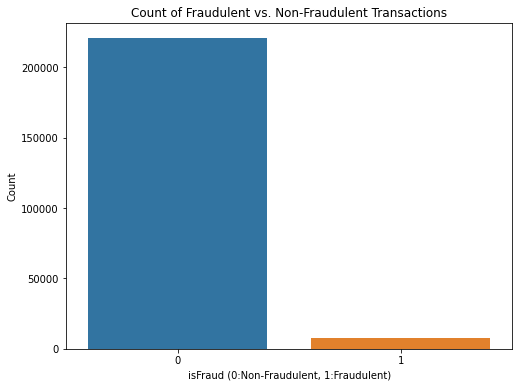

In [10]:
counts = df.isFraud.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('isFraud (0:Non-Fraudulent, 1:Fraudulent)')

In [11]:
counts = df.isFraud.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 220645 non-fraudulent transactions (96.538%) and 7912 fraudulent transactions (3.462%).


In [16]:
non_fraud = df[df['isFraud'] == 0]
fraud = df[df['isFraud'] == 1]
selected = non_fraud.sample(fraudulent)
selected.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,isFraud,cvvMatch,accountAge,transactionDay,transAmount:Balance,transAmount:credLim,addrChange
198107,877017103,2014-01-31,US,1975.69,731,4690,0,5000,3024.31,24-May,2016-05-17,731,0,online_retail,US,target.com,8.0,9.0,337.91,2016-05-20 20:41:51+00:00,PURCHASE,0,1,6,4,0.111731,0.067582,27
6709,146196930,2013-01-02,US,2123.50,694,4063,1,15000,12876.50,20-Mar,2013-01-02,694,0,food,US,South Drive in,1.0,5.0,166.05,2016-07-09 16:29:12+00:00,PURCHASE,0,1,7,5,0.012896,0.011070,12
166395,771825487,2014-05-15,US,9310.04,496,4724,0,10000,689.96,23-Jan,2014-05-15,496,0,food_delivery,US,DailyOmnivore,1.0,9.0,32.36,2016-06-09 14:20:56+00:00,PURCHASE,0,1,6,3,0.046901,0.003236,29
18473,197905030,2015-12-08,US,14383.38,402,541,1,15000,616.62,21-Aug,2015-12-08,402,0,hotels,US,Hilton Hotels #533600,1.0,5.0,193.43,2016-05-05 16:11:42+00:00,PURCHASE,0,1,4,3,0.313694,0.012895,6
8678,151887933,2015-02-16,US,1328.61,108,528,0,5000,3671.39,19-Aug,2016-02-24,108,0,rideshare,US,Uber,1.0,2.0,104.14,2016-07-05 22:27:14+00:00,PURCHASE,0,1,5,1,0.028365,0.020828,20


In [17]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

15824

In [18]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,isFraud,cvvMatch,accountAge,transactionDay,transAmount:Balance,transAmount:credLim,addrChange
0,595935956,2011-07-10,US,4941.93,207,8826,0,7500,2558.07,26-Apr,2011-07-10,207,0,online_retail,US,gap.com,99.0,9.0,159.46,2016-11-04 20:52:40+00:00,PURCHASE,0,1,9,4,0.062336,0.021261,4
1,297952999,2014-01-06,US,8197.75,556,2386,0,15000,6802.25,22-Jan,2016-02-15,556,0,online_retail,US,amazon.com,1.0,5.0,0.00,2016-03-19 00:19:33+00:00,ADDRESS_VERIFICATION,0,1,6,5,0.000000,0.000000,29
2,228399966,2013-12-31,US,4959.06,901,7538,0,5000,40.94,30-Dec,2016-02-04,901,0,online_retail,US,amazon.com,1.0,9.0,415.13,2016-11-02 13:43:13+00:00,PURCHASE,1,1,6,2,10.139961,0.083026,10
3,701523321,2014-08-04,US,14817.96,751,1009,0,15000,182.04,24-Dec,2014-08-04,751,0,online_retail,US,gap.com,1.0,9.0,137.69,2016-04-16 08:51:59+00:00,PURCHASE,1,1,5,5,0.756372,0.009179,10
4,409187736,2015-10-17,US,107.47,646,2281,1,500,392.53,25-Feb,2015-10-17,646,0,fuel,US,Texas Gas #143387,1.0,5.0,50.59,2016-11-24 06:29:52+00:00,PURCHASE,0,1,4,3,0.128882,0.101180,27


Text(0.5, 0, 'isFraud (0:Non-Fraudulent, 1:Fraudulent)')

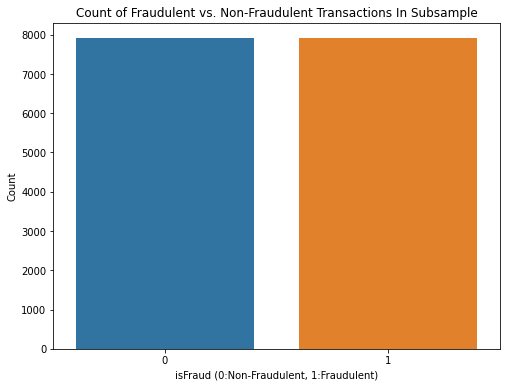

In [19]:
new_counts = subsample.isFraud.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('isFraud (0:Non-Fraudulent, 1:Fraudulent)')

In [20]:
corr = subsample.corr()
corr = corr[['isFraud']]
corr

,isFraud
accountNumber,-2.146931e-02
availableMoney,5.481404e-03
cardCVV,-1.893323e-02
cardLast4Digits,-3.023491e-02
cardPresent,-5.408194e-02
creditLimit,2.194475e-02
currentBalance,3.284671e-02
enteredCVV,-1.887028e-02
expirationDateKeyInMatch,-4.293774e-18
posConditionCode,2.658573e-02


In [21]:
#negative correlations
corr[corr.isFraud < 0]


,isFraud
accountNumber,-2.146931e-02
cardCVV,-1.893323e-02
cardLast4Digits,-3.023491e-02
cardPresent,-5.408194e-02
enteredCVV,-1.887028e-02
expirationDateKeyInMatch,-4.293774e-18
cvvMatch,-2.527028e-02
accountAge,-5.402095e-03
transactionDay,-3.497962e-03
addrChange,-2.354322e-02


In [22]:
#positive correlations
corr[corr.isFraud > 0]

,isFraud
availableMoney,0.005481
creditLimit,0.021945
currentBalance,0.032847
posConditionCode,0.026586
posEntryMode,0.014751
transactionAmount,0.287091
isFraud,1.000000
transAmount:Balance,0.016412
transAmount:credLim,0.078981


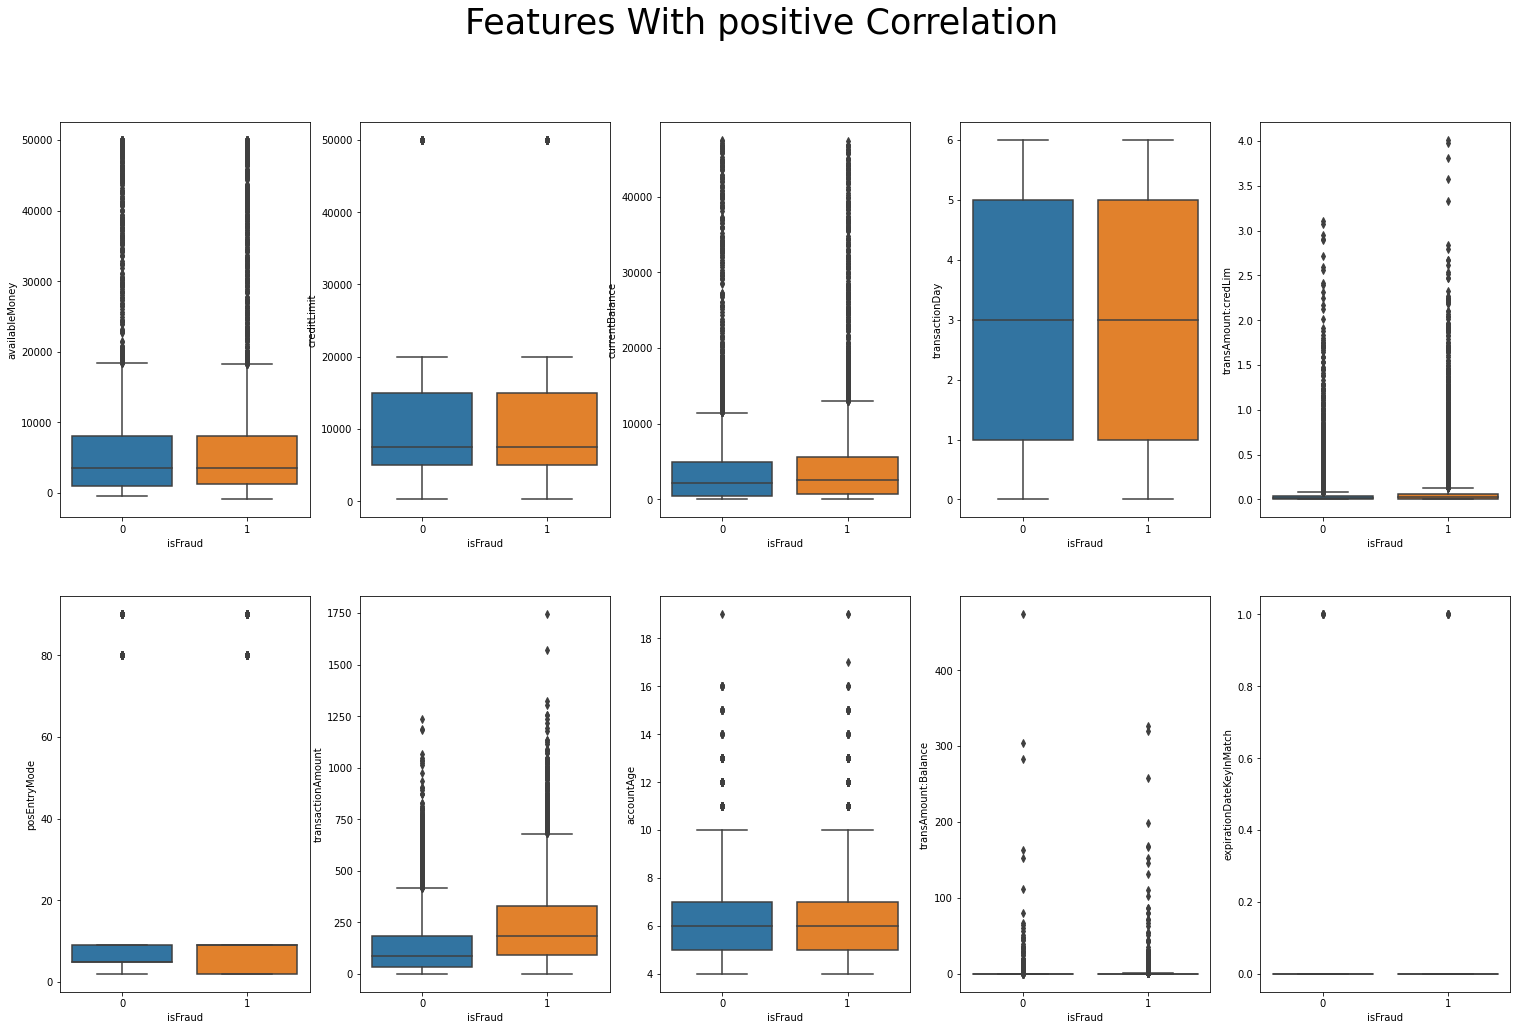

In [23]:
#visualizing the features w hig correlation
f, axes = plt.subplots(nrows=2, ncols=5, figsize=(26,16))

f.suptitle('Features With positive Correlation', size=35)
sns.boxplot(x="isFraud", y="availableMoney", data=subsample, ax=axes[0,0])
sns.boxplot(x="isFraud", y="creditLimit", data=subsample, ax=axes[0,1])
sns.boxplot(x="isFraud", y="currentBalance", data=subsample, ax=axes[0,2])
#sns.boxplot(x="isFraud", y="posConditionCode", data=subsample, ax=axes[1,4])
sns.boxplot(x="isFraud", y="posEntryMode", data=subsample, ax=axes[1,0])
sns.boxplot(x="isFraud", y="transactionAmount", data=subsample, ax=axes[1,1])
#sns.boxplot(x="isFraud", y="cvvMatch", data=subsample, ax=axes[1,4])
sns.boxplot(x="isFraud", y="accountAge", data=subsample, ax=axes[1,2])
sns.boxplot(x="isFraud", y="transactionDay", data=subsample, ax=axes[0,3])
sns.boxplot(x="isFraud", y="transAmount:credLim", data=subsample, ax=axes[0,4])
sns.boxplot(x="isFraud", y="transAmount:Balance", data=subsample, ax=axes[1,3])
sns.boxplot(x="isFraud", y="expirationDateKeyInMatch", data=subsample, ax=axes[1,4])


In [12]:
df['transactionDay'] = df['transactionDateTime'].dt.dayofweek

In [26]:
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,isFraud,cvvMatch,accountAge,transactionDay
0,100547107,2011-10-30,US,2430.03,786,1222,1,2500,69.97,29-Jun,10/30/2011,786,False,fastfood,US,Arbys #46046,1.0,2.0,204.23,2016-01-17 21:50:04+00:00,PURCHASE,0,1,8,6
1,100547107,2011-10-30,US,2070.52,786,1222,1,2500,429.48,27-Jan,10/30/2011,786,False,fastfood,US,In-N-Out #27394,1.0,9.0,91.14,2016-01-30 20:49:10+00:00,PURCHASE,0,1,8,5
2,100547107,2011-10-30,US,2100.09,786,1222,1,2500,399.91,22-Mar,10/30/2011,786,False,fastfood,US,Wendys #327348,1.0,2.0,1.06,2016-02-26 04:02:55+00:00,PURCHASE,0,1,8,4
3,100547107,2011-10-30,US,2408.37,786,1222,1,2500,91.63,28-Dec,10/30/2011,786,False,fastfood,US,Tim Hortons #911569,8.0,2.0,286.07,2016-04-02 20:23:39+00:00,PURCHASE,1,1,8,5
4,100547107,2011-10-30,US,2049.98,786,1222,1,2500,450.02,27-Apr,10/30/2011,786,False,fastfood,US,Popeyes #203711,1.0,2.0,31.63,2016-04-06 15:10:02+00:00,PURCHASE,0,1,8,2


In [50]:
subsample['transactionDay'] =  subsample['transactionDateTime'].dt.dayofweek
fraud['transactionDay'] =  fraud['transactionDateTime'].dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
fraud.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,isFraud,cvvMatch,accountAge,transactionDay,transAmount:Balance,transAmount:credLim,addrChange
0,100547107,2011-10-30,US,2408.37,786,1222,1,2500,91.63,28-Dec,2011-10-30,786,0,fastfood,US,Tim Hortons #911569,8.0,2.0,286.07,2016-04-02 20:23:39+00:00,PURCHASE,1,1,8,5,3.122012,0.114428,13
1,101680180,2015-06-28,US,11035.78,338,9629,0,15000,3964.22,29-Jun,2015-06-28,338,0,online_retail,US,walmart.com,1.0,2.0,311.71,2016-11-02 13:22:04+00:00,PURCHASE,1,1,5,2,0.078631,0.020781,15
2,101680180,2015-06-28,US,10724.07,338,9629,0,15000,4275.93,24-Feb,2015-06-28,338,0,online_retail,US,ebay.com,1.0,5.0,190.49,2016-11-18 07:01:33+00:00,PURCHASE,1,1,5,4,0.044549,0.012699,15
3,102307135,2014-08-02,US,18682.20,382,9840,1,20000,1317.80,28-Feb,2014-08-02,382,0,personal care,US,Universe Massage #357768,1.0,9.0,64.92,2016-12-16 20:57:58+00:00,PURCHASE,1,1,5,4,0.049264,0.003246,11
4,102635965,2015-08-30,US,996.90,628,1923,1,1000,3.10,23-Nov,2015-08-30,628,0,entertainment,US,Regal Cinemas #05791,1.0,2.0,209.02,2016-06-08 10:38:24+00:00,PURCHASE,1,1,4,2,67.425806,0.209020,13


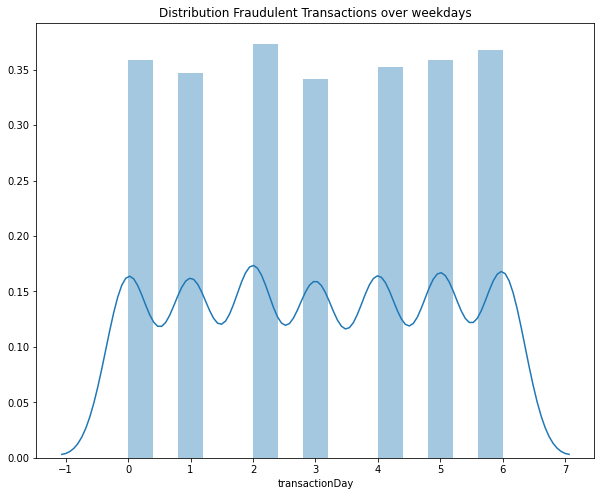

In [24]:
plt.figure(figsize=(10,8))
plt.title('Distribution Fraudulent Transactions over weekdays')
sns.distplot(fraud.transactionDay)

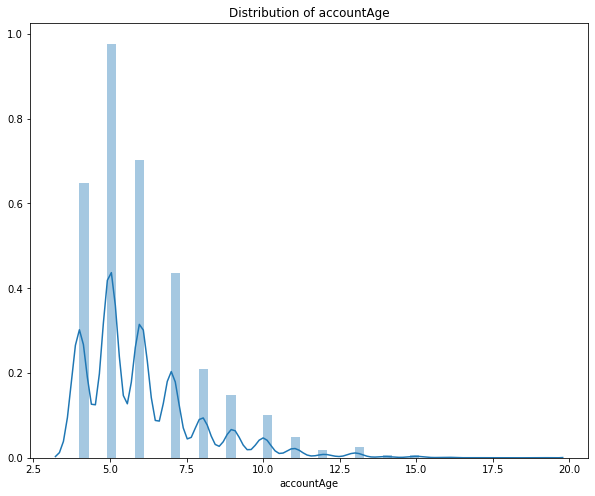

In [25]:
plt.figure(figsize=(10,8))
plt.title('Distribution of accountAge')
sns.distplot(fraud.accountAge)

In [13]:
df['transAmount:Balance'] = df['transactionAmount'] / df['currentBalance']
df['transAmount:credLim'] = df['transactionAmount'] / df['creditLimit']

In [14]:
df['dateOfLastAddressChange']= pd.to_datetime(df['dateOfLastAddressChange'])
df['addrChange'] = [relativedelta(pd.to_datetime('now'), d).days for d in df['dateOfLastAddressChange']]

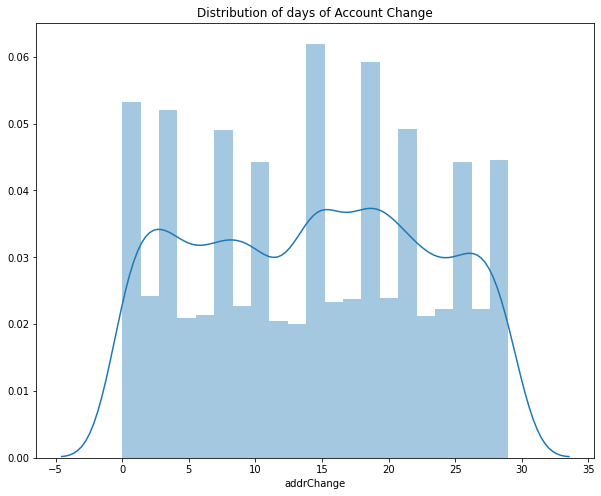

In [26]:
plt.figure(figsize=(10,8))
plt.title('Distribution of days of Account Change')
sns.distplot(fraud.addrChange)

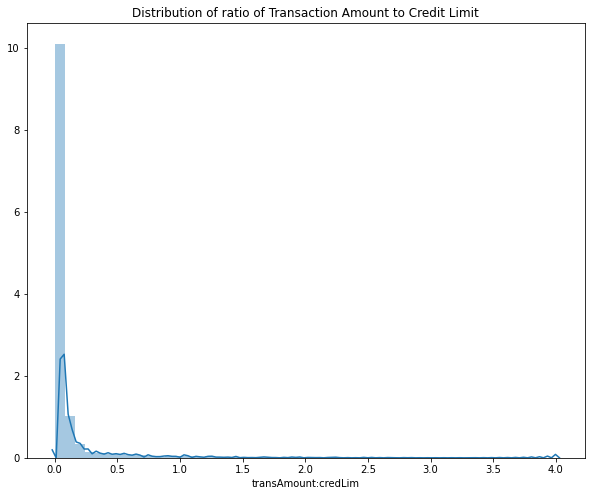

In [27]:
plt.figure(figsize=(10,8))
plt.title('Distribution of ratio of Transaction Amount to Credit Limit')
sns.distplot(fraud['transAmount:credLim'])

In [28]:
subsample.isnull().sum()

accountNumber                 0
accountOpenDate               0
acqCountry                  132
availableMoney                0
cardCVV                       0
cardLast4Digits               0
cardPresent                   0
creditLimit                   0
currentBalance                0
currentExpDate                0
dateOfLastAddressChange       0
enteredCVV                    0
expirationDateKeyInMatch      0
merchantCategoryCode          0
merchantCountryCode          55
merchantName                  0
posConditionCode             11
posEntryMode                215
transactionAmount             0
transactionDateTime           0
transactionType              16
isFraud                       0
cvvMatch                      0
accountAge                    0
transactionDay                0
transAmount:Balance          22
transAmount:credLim           0
addrChange                    0
dtype: int64

In [32]:
X = df.drop(['isFraud','transactionDateTime'], axis=1)
y = df['isFraud']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((182845, 26), (45712, 26), (182845,), (45712,))

In [33]:
model = RandomForestClassifier(n_estimators=100)

# Fit on training data
model.fit(X_train, Y_train)

# Make predictions on holdout test data
predictions = model.predict(X_test)

TypeError: ignored